# Introduction to Causal Inference

## Step 1: Loading and inspecting the raw discount data

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import statsmodels.formula.api as smf
import graphviz as gr
# in case graphviz receives a "ModuleNotFoundError: No module named 'graphviz'" then install python-graphviz and pydot packages to resolve the issue

Having clean datasets that you trust is fundamental to causal inference. Causal inference is often counterintuitive, and when counterintuitive conclusions come up, it’s nice to be sure that it isn’t just some data bug crawling in. Trusting and understanding your data is an important step to save you time down the road.

In [144]:
df = pd.read_csv("non_rand_discount.csv")

In [145]:
df.head()

,spend_1m_baby;spend_2m_baby;spend_3m_baby;spend_4m_baby;spend_5m_baby;spend_6m_baby;spend_1m_clothes;spend_2m_clothes;spend_3m_clothes;spend_4m_clothes;spend_5m_clothes;spend_6m_clothes;spend_1m_health;spend_2m_health;spend_3m_health;spend_4m_health;spend_5m_health;spend_6m_health;spend_1m_pet;spend_2m_pet;spend_3m_pet;spend_4m_pet;spend_5m_pet;spend_6m_pet;spend_1m_groceries;spend_2m_groceries;spend_3m_groceries;spend_4m_groceries;spend_5m_groceries;spend_6m_groceries;spend_1m_eletronic;spend_2m_eletronic;spend_3m_eletronic;spend_4m_eletronic;spend_5m_eletronic;spend_6m_eletronic;sales;discount;profit;age;gender;cust_state;tenure;sales_prediction_bins;sales_prediction
0,0;0;0;0;0;0.0;0;0.0;0.0;0.0;0.0;0.0;0;0;0;0;0;...
1,0;0;0;0;0;0.0;0;0.0;0.0;0.0;0.0;0.0;0;0;0;0;0;...
2,0;0;0;0;0;0.0;0;0.0;0.0;0.0;0.0;0.0;0;0;0;0;0;...
3,0;0;0;0;0;0.0;0;0.0;0.0;0.0;0.0;0.0;0;0;0;0;0;...
4,0;0;0;0;0;0.0;0;0.0;0.0;0.0;0.0;0.0;0;0;0;0;0;...


The data is separated by `;` instead of the default `,`

In [146]:
df = pd.read_csv("non_rand_discount.csv", sep = ';')

In [147]:
df.head()

,spend_1m_baby,spend_2m_baby,spend_3m_baby,spend_4m_baby,spend_5m_baby,spend_6m_baby,spend_1m_clothes,spend_2m_clothes,spend_3m_clothes,spend_4m_clothes,...,spend_6m_eletronic,sales,discount,profit,age,gender,cust_state,tenure,sales_prediction_bins,sales_prediction
0,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,3368.64,US$ 125.0,40.06,40,1.0,MA,6,8,1351.024765
1,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,2133.10,US$ 75.0,29.52,36,0.0,MG,10,4,1035.580387
2,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,2001.62,US$ 50.0,48.08,34,0.0,RJ,7,3,992.401825
3,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,1461.96,US$ 10.0,61.64,31,0.0,BA,7,1,919.720735
4,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,2743.72,US$ 100.0,34.44,32,1.0,PB,6,6,1176.485681


In [148]:
# Checking the data types

df.dtypes

spend_1m_baby              int64
spend_2m_baby              int64
spend_3m_baby              int64
spend_4m_baby              int64
spend_5m_baby              int64
spend_6m_baby            float64
spend_1m_clothes           int64
spend_2m_clothes         float64
spend_3m_clothes         float64
spend_4m_clothes         float64
spend_5m_clothes         float64
spend_6m_clothes         float64
spend_1m_health            int64
spend_2m_health            int64
spend_3m_health            int64
spend_4m_health            int64
spend_5m_health            int64
spend_6m_health            int64
spend_1m_pet               int64
spend_2m_pet               int64
spend_3m_pet               int64
spend_4m_pet               int64
spend_5m_pet               int64
spend_6m_pet               int64
spend_1m_groceries         int64
spend_2m_groceries         int64
spend_3m_groceries       float64
spend_4m_groceries       float64
spend_5m_groceries       float64
spend_6m_groceries       float64
spend_1m_e

The data types in the dataset mostly consist of integers (`int64`) and floats (`float64`), which is appropriate for numerical data. However, there are two columns with data type `object` which usually indicates string data in pandas:

`discount`: This column might contain numeric values that are currently treated as strings. If this column represents numeric data, such as discount rates or amounts, it should be converted to a numeric type.
`cust_state`: This column likely contains categorical data representing customer states, so its data type as object (string) might be appropriate unless it's intended to be numerical.

In [149]:
df['discount']

0        US$ 125.0
1         US$ 75.0
2         US$ 50.0
3         US$ 10.0
4        US$ 100.0
           ...    
14995    US$ 110.0
14996    US$ 135.0
14997      US$ 0.0
14998    US$ 145.0
14999     US$ 30.0
Name: discount, Length: 15000, dtype: object

In [150]:
# Checking if all rows in 'discount' start with "US$"
all_start_with_usd = df['discount'].str.startswith('US$').all()

In [151]:
all_start_with_usd

True

In [152]:
df['discount'] = pd.to_numeric(df['discount'].str.split(' ').str[-1])
df['discount']

0        125.0
1         75.0
2         50.0
3         10.0
4        100.0
         ...  
14995    110.0
14996    135.0
14997      0.0
14998    145.0
14999     30.0
Name: discount, Length: 15000, dtype: float64

In [153]:
df.dtypes

spend_1m_baby              int64
spend_2m_baby              int64
spend_3m_baby              int64
spend_4m_baby              int64
spend_5m_baby              int64
spend_6m_baby            float64
spend_1m_clothes           int64
spend_2m_clothes         float64
spend_3m_clothes         float64
spend_4m_clothes         float64
spend_5m_clothes         float64
spend_6m_clothes         float64
spend_1m_health            int64
spend_2m_health            int64
spend_3m_health            int64
spend_4m_health            int64
spend_5m_health            int64
spend_6m_health            int64
spend_1m_pet               int64
spend_2m_pet               int64
spend_3m_pet               int64
spend_4m_pet               int64
spend_5m_pet               int64
spend_6m_pet               int64
spend_1m_groceries         int64
spend_2m_groceries         int64
spend_3m_groceries       float64
spend_4m_groceries       float64
spend_5m_groceries       float64
spend_6m_groceries       float64
spend_1m_e

In [154]:
# Checking for nulls, especially in the outcome (profit) and treatment variable (discount)
df.isna().mean()

# profit and discount have no nulls, gender has 9% nulls

spend_1m_baby            0.000000
spend_2m_baby            0.000000
spend_3m_baby            0.000000
spend_4m_baby            0.000000
spend_5m_baby            0.000000
spend_6m_baby            0.000000
spend_1m_clothes         0.000000
spend_2m_clothes         0.000000
spend_3m_clothes         0.000000
spend_4m_clothes         0.000000
spend_5m_clothes         0.000000
spend_6m_clothes         0.000000
spend_1m_health          0.000000
spend_2m_health          0.000000
spend_3m_health          0.000000
spend_4m_health          0.000000
spend_5m_health          0.000000
spend_6m_health          0.000000
spend_1m_pet             0.000000
spend_2m_pet             0.000000
spend_3m_pet             0.000000
spend_4m_pet             0.000000
spend_5m_pet             0.000000
spend_6m_pet             0.000000
spend_1m_groceries       0.000000
spend_2m_groceries       0.000000
spend_3m_groceries       0.000000
spend_4m_groceries       0.000000
spend_5m_groceries       0.000000
spend_6m_groce

# Step 2: Understanding the treatment assignment mechanism

This particular e-commerce company makes 5% on sales, so its revenues are `0.05 * Sales`. You can consider that its costs are mostly how much it gives in discounts. Hence, profitability is given by `5% * Sales - Discount`.

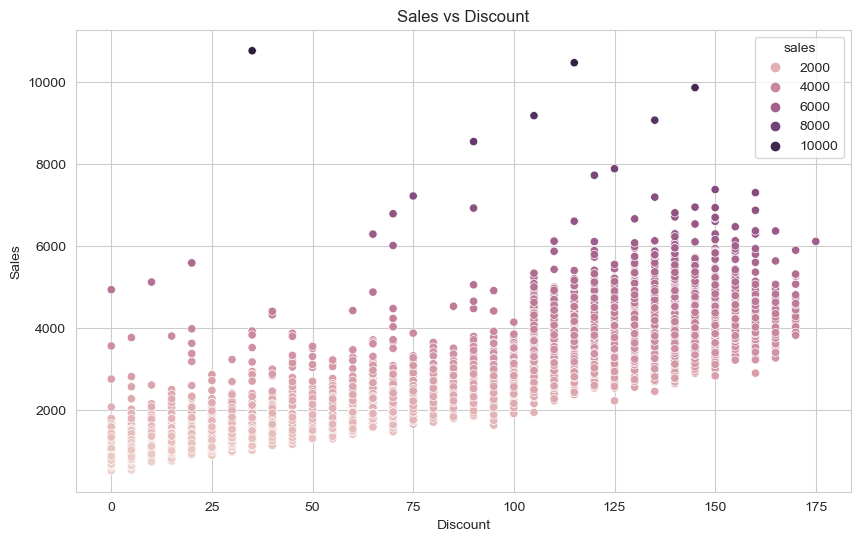

In [155]:
# Visualize relationship between discount and sales using seaborn

sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='discount', y='sales', hue='sales')

plt.title('Sales vs Discount')
plt.xlabel('Discount')
plt.ylabel('Sales')

plt.show()

Text(0, 0.5, 'Sales')

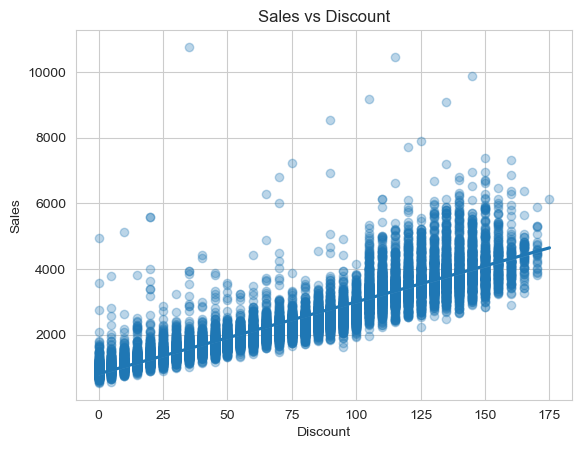

In [156]:
sns.regplot(data = df, x="discount", y="sales", scatter_kws={"alpha":0.3})
plt.title('Sales vs Discount')
plt.xlabel('Discount')
plt.ylabel('Sales')


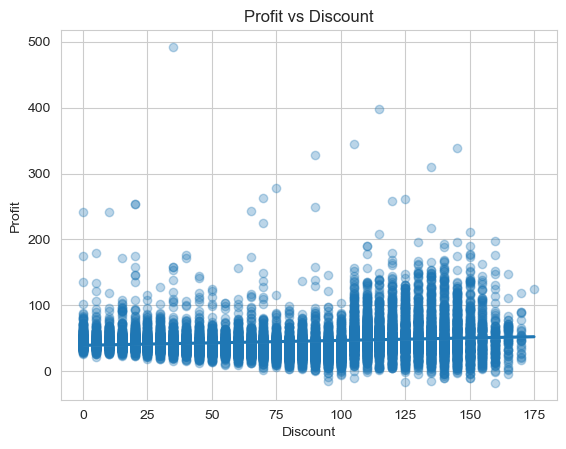

In [157]:
# Let us do the same for profits vs discount

sns.regplot(data=df,x='discount', y='profit', scatter_kws={"alpha":0.3})

plt.title('Profit vs Discount')
plt.xlabel('Discount')
plt.ylabel('Profit')

plt.show()

We see that volume of sales increases with discount, profit doesn't seem to increase with discount at as high a rate as sales but it does seem to have a positive correlation to discount.

We recall from the introduction that the e-commerce company allocates more discounts to customers with higher sales predictions, where sales predictions are given by their machine learning model. This means people with different discount levels are probably different in other dimensions as well.

Let us look at age, customer state, sales prediction in relationship to discount.

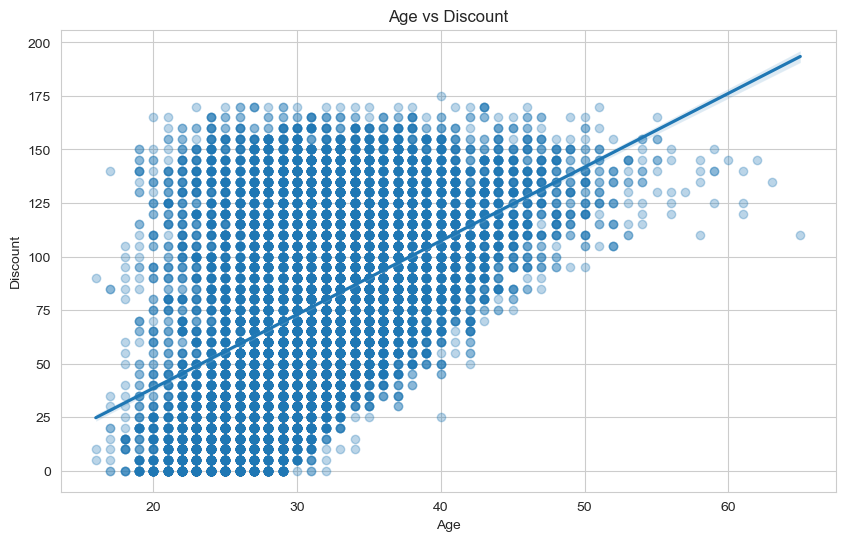

In [158]:
# Age vs discount

sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.regplot(data=df, x="age", y="discount", scatter_kws={"alpha":0.3})

plt.title('Age vs Discount')
plt.xlabel('Age')
plt.ylabel('Discount')

plt.show()

Younger folks seem to get more discounts than the older folks who only seen to get higher discounts.

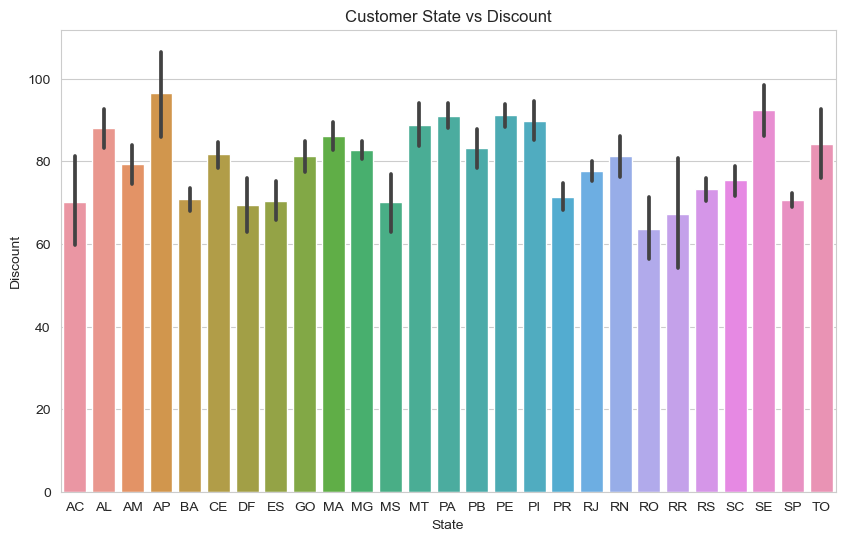

In [159]:
# State vs discount

sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.barplot(data = df.sort_values("cust_state"), x="cust_state", y="discount")

plt.title('Customer State vs Discount')
plt.xlabel('State')
plt.ylabel('Discount')

plt.show()

There doesn't seem to be much of a pattern in discounts given to different states.

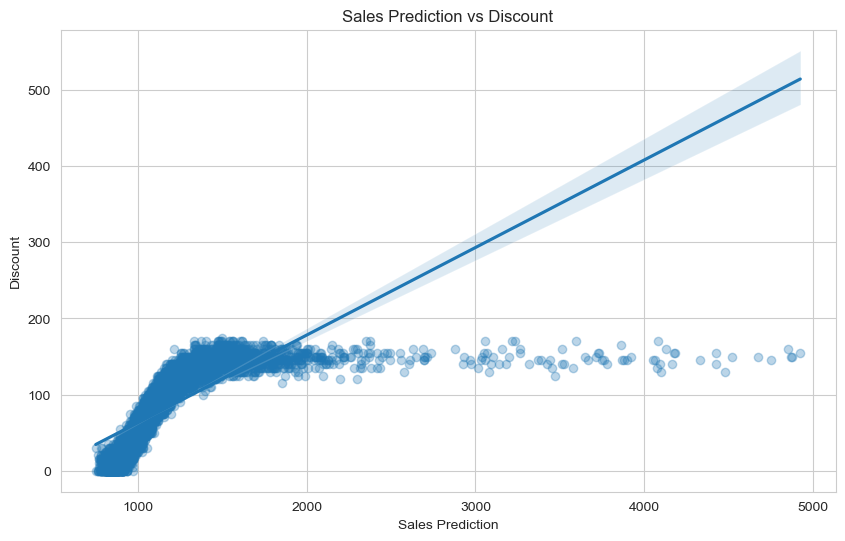

In [160]:
# Sales prediction vs discount

sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.regplot(data=df, x="sales_prediction", y="discount", scatter_kws={"alpha":0.3})

plt.title('Sales Prediction vs Discount')
plt.xlabel('Sales Prediction')
plt.ylabel('Discount')

plt.show()

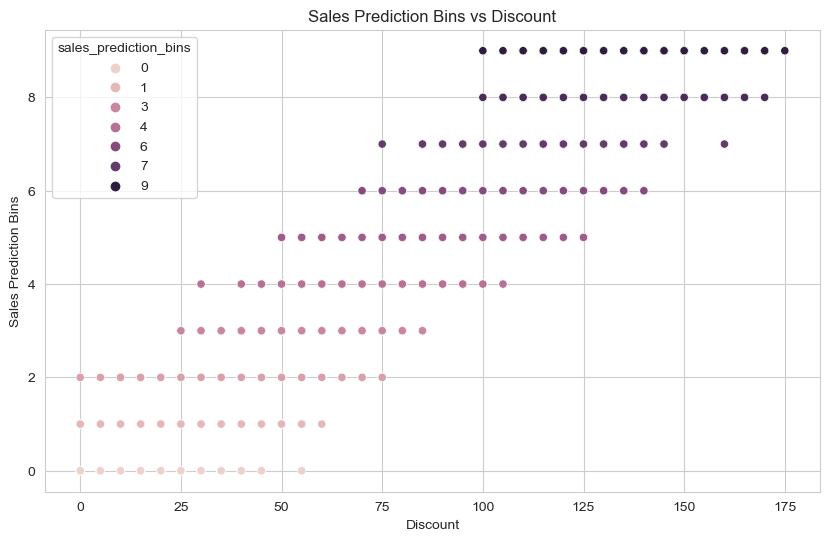

In [161]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='discount', y='sales_prediction_bins', hue='sales_prediction_bins')

plt.title('Sales Prediction Bins vs Discount')
plt.xlabel('Discount')
plt.ylabel('Sales Prediction Bins')

plt.show()

Both raw sales predictions and binned predictions tell us that higher sales predictions got customers higher discounts.

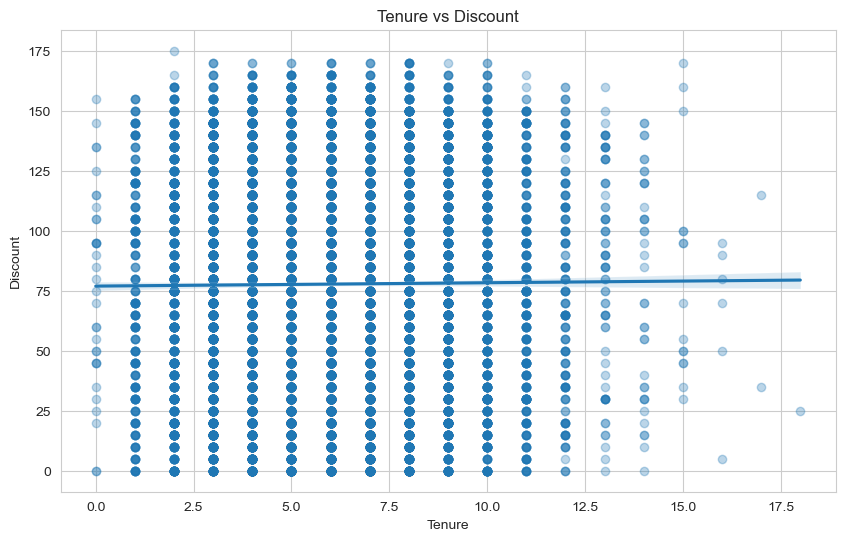

In [162]:
# Let us look at tenure vs discount

sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.regplot(data=df,x="tenure", y="discount", scatter_kws={"alpha":0.3})

plt.title('Tenure vs Discount')
plt.xlabel('Tenure')
plt.ylabel('Discount')

plt.show()

The relationship between tenure and discount seems to be fairly even. 

As a last step let us see if there are any correlations we can find between the numerical variables and discount.

In [163]:
# Calculate the correlation matrix
numerical_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_df.corr()

# Extract the correlations of all variables with 'discount'
discount_correlations = correlation_matrix['discount'].sort_values()

discount_correlations

spend_6m_pet            -0.010957
spend_1m_groceries      -0.009497
spend_2m_eletronic      -0.009252
spend_5m_health         -0.008108
spend_2m_pet            -0.006139
spend_1m_clothes        -0.005611
spend_4m_health         -0.003368
spend_3m_health         -0.001577
spend_4m_baby           -0.000966
spend_1m_eletronic       0.000157
spend_3m_eletronic       0.001687
spend_3m_pet             0.002247
spend_1m_baby            0.003552
spend_1m_pet             0.003595
spend_2m_groceries       0.005716
spend_2m_health          0.006335
spend_5m_pet             0.006859
spend_2m_baby            0.007271
tenure                   0.007725
spend_6m_health          0.008773
spend_1m_health          0.009586
spend_4m_pet             0.011029
spend_3m_baby            0.013365
spend_5m_baby            0.014439
spend_4m_eletronic       0.022122
spend_5m_eletronic       0.026230
spend_6m_eletronic       0.038200
gender                   0.104481
profit                   0.140819
spend_2m_cloth

Based on the correlations, we've already covered sales, age, sales predictions, let us look at groceries spend to visualize the relationship.

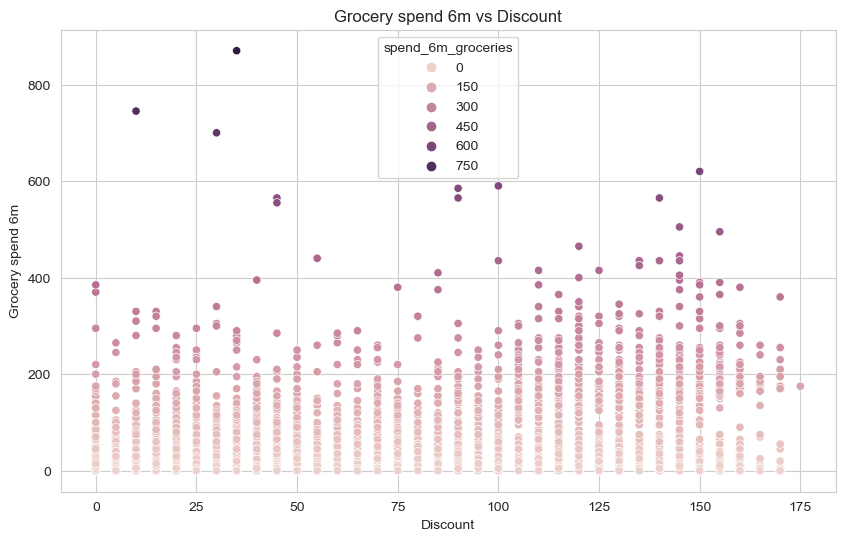

In [164]:
# Grocery spend vs discount

sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='discount', y='spend_6m_groceries', hue='spend_6m_groceries')

plt.title('Grocery spend 6m vs Discount')
plt.xlabel('Discount')
plt.ylabel('Grocery spend 6m')

plt.show()

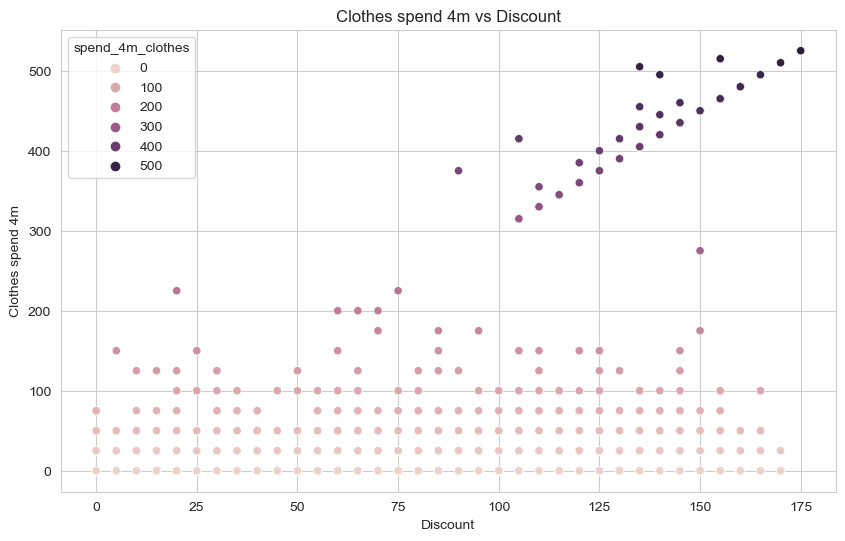

In [165]:
# Clothes spend vs discount

sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='discount', y='spend_4m_clothes', hue='spend_4m_clothes')

plt.title('Clothes spend 4m vs Discount')
plt.xlabel('Discount')
plt.ylabel('Clothes spend 4m')

plt.show()

While it is harder to spot a clear visual relationship between grocery spend and discount, when trying the same for clothes spend, we can see that higher 4 month spend customers get a steeper discount.

Now that we've explored relationships of various variables with discount, it looks like sales prediction is a big driver of discounts. In other words, the treatment assignment mechanism is given primarily by sales prediction. Let us see how profits are affected by these sales predictions.

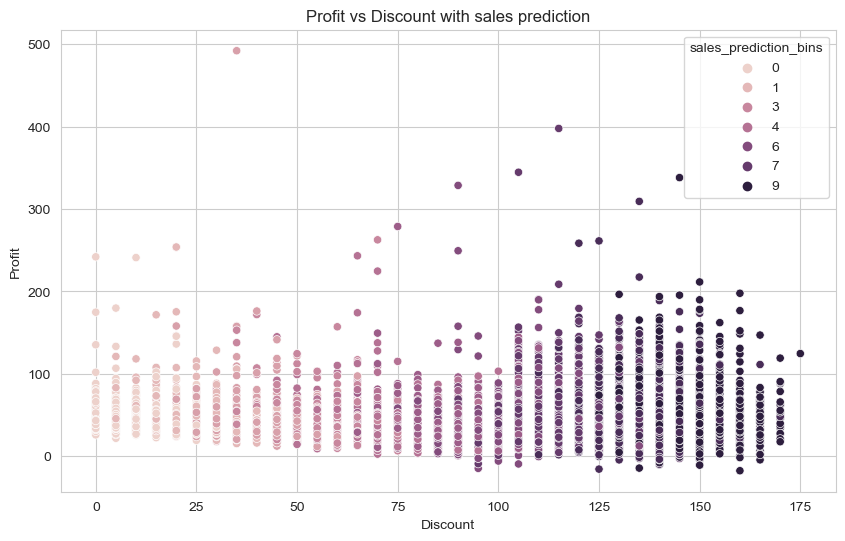

In [166]:
# Profits vs discount with color dimension of sales predictions

sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='discount', y='profit', hue='sales_prediction_bins')

plt.title('Profit vs Discount with sales prediction')
plt.xlabel('Discount')
plt.ylabel('Profit')

plt.show()

It is clear that higher sales predictions got higher discounts, but did they necessarily have higher profits, the distribution of profits for higher discounts is more spread than lower discounts.

This means that customers who received higher discounts would have spent a lot anyway, so it does not necessarily lead us to a causal relationship.

In term sof potential outcome:

$$
E[Profit_0|Discount=High] > E[Profit_0|Discount=Low]
$$

The profit from users who received a high discount, even if they had received low discounts (potential outcome 0), would have been higher than the ones who received low discounts.

# Step 3: Confounding Bias

Now let us look at the relationship between the treatment (discount) and the outcome (profits) further through linear regression. 

In [167]:
model = smf.ols("profit~discount", data=df).fit()
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,39.4217,0.382,103.274,0.000,38.673,40.170
discount,0.0743,0.004,17.419,0.000,0.066,0.083


In [168]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     303.4
Date:                Mon, 01 Apr 2024   Prob (F-statistic):           2.71e-67
Time:                        16:59:58   Log-Likelihood:                -68395.
No. Observations:               15000   AIC:                         1.368e+05
Df Residuals:                   14998   BIC:                         1.368e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.4217      0.382    103.274      0.000      38.673      40.170
discount       0.0743      0.004     17.419      0.000       0.066       0.083
==============================================================================
Omnibus:                    11175.278   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           516086.235
Skew:                           3.118   Prob(JB):                         0.00
Kurtosis:                      31.051   Cond. No.                         181.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on our OLS regression analysis, for each additional unit of discount, we expect profit to increase by 0.0743 units, with this relationship being statistically significant (p = 0.000). 

In [169]:
model = smf.ols("sales~discount", data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                 6.341e+04
Date:                Mon, 01 Apr 2024   Prob (F-statistic):               0.00
Time:                        16:59:58   Log-Likelihood:            -1.1363e+05
No. Observations:               15000   AIC:                         2.273e+05
Df Residuals:                   14998   BIC:                         2.273e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    804.5246      7.790    103.274      0.000     789.255     819.794
discount      21.9248      0.087    251.815      0.000      21.754      22.095
==============================================================================
Omnibus:                    11175.308   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           516097.915
Skew:                           3.118   Prob(JB):                         0.00
Kurtosis:                      31.051   Cond. No.                         181.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on our OLS regression analysis, for each additional unit of discount, we expect sales to increase by 21.9248 units, with this relationship being statistically significant (p = 0.000). 

This ties very well to what we saw in the plot earlier.

In [170]:
# Running a regression of sales_prediction and age on discounts

model = smf.ols("discount ~ sales_prediction + age", data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               discount   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                 1.176e+04
Date:                Mon, 01 Apr 2024   Prob (F-statistic):               0.00
Time:                        16:59:58   Log-Likelihood:                -71057.
No. Observations:               15000   AIC:                         1.421e+05
Df Residuals:                   14997   BIC:                         1.421e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -102.3049      1.299    -78.761      0.000    -104.851     -99.759
sales_prediction     0.1011      0.001    119.864      0.000       0.099       0.103
age                  2.1037      0.038     55.864      0.000       2.030       2.178
==============================================================================
Omnibus:                     6838.726   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           148686.803
Skew:                          -1.683   Prob(JB):                         0.00
Kurtosis:                      18.052   Cond. No.                     6.70e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

With every unit increase in sales prediction we can expect discount to increase by 0.1011 units and for every unit increase in age when sales prediction is held constant, we can expect discount to increase by 2.1037 units, on average.

Discounts were assigned based on sales predictions, higher sales prediction led to higher discount. So the users who received high discount would have had higher profits anyway. The relationship between discount and profit is not purely causal but impacted by confounding bias factors such as sales prediction. The direction of the bias is probably negative, since

$$
BIAS = E[Profit_0|Discount=High] - E[Profit_0|Discount=Low]
$$

Confounders are variables that cause both the treatment and the outcome. We can't check for the existence of confounders just by looking at the data, but we can leverage our intuition about how the world works. From previous steps, we know that higher the age, higher the discount. Older customers tend to have a higher income and, probably, higher sales and profit. Age is thus a possible confounder because it causes discounts to go up and sales to go up. Sales prediction is a potential confounder here as it causes discounts to go up and profit to go up.

If we have to visualize our understanding of the bias in this relationship between age, sales prediction, discount and profit:

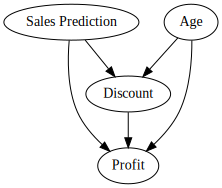

In [185]:
g = gr.Digraph()

g.edge("Discount", "Profit")
g.edge("Sales Prediction", "Profit")
g.edge("Sales Prediction", "Discount")
g.edge("Age", "Discount")
g.edge("Age", "Profit")


g # show the graph

# Step 4: Regression Adjustment

- Here we will use linear regression to adjust for confounding bias. 
- Learn how to mitigate bias in the absence of randomization.
- Understand the importance of the FWL (Frisch-Waugh-Lovell) theorem

So far we saw that customers with low discounts are fundamentally different from customers with high discounts. Hence, the difference we are seeing in profits between low and high discounts is probably due to other confounding factors. 

In order to estimate the impact of discounts on profits, we have to make customers with different discount levels comparable. We will do this using linear regression. 
We usually see linear regression being used for prediction tasks and now will see how to use it for causal inference.

Even though we know that discount and profit have a positive relationship, we also know that it is biased by sales prediction. More discounts are given to customers with higher sales prediction. In order to estimate the impact of discount on profit, we need to keep sales prediction constant. We can do this well using regression.

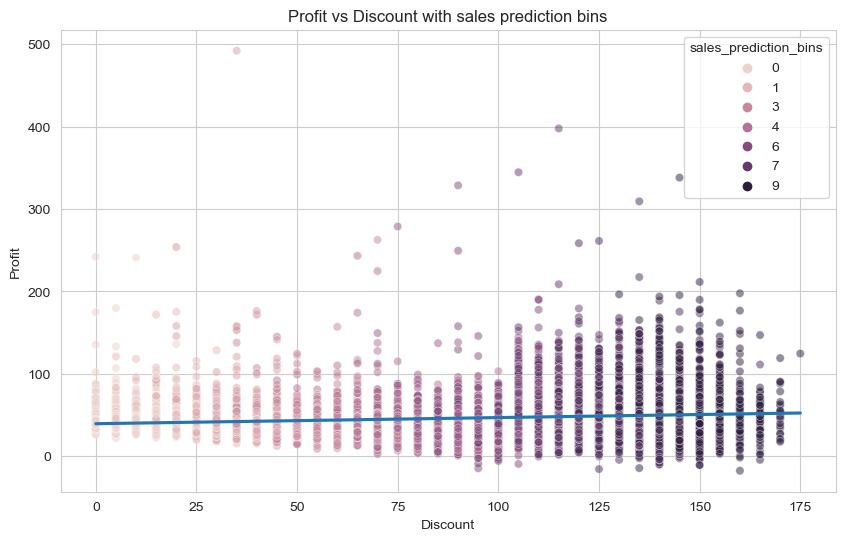

In [172]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='discount', y='profit', hue='sales_prediction_bins', alpha=0.5)
sns.regplot(data=df,x='discount', y='profit', scatter=False)

plt.title('Profit vs Discount with sales prediction bins')
plt.xlabel('Discount')
plt.ylabel('Profit')

plt.show()

In [173]:
# OLS regression of discount on sales_prediction_bins treating it as a categorical variable
model = smf.ols("discount ~ C(sales_prediction_bins)", data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               discount   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                 2.552e+04
Date:                Mon, 01 Apr 2024   Prob (F-statistic):               0.00
Time:                        17:00:01   Log-Likelihood:                -57189.
No. Observations:               15000   AIC:                         1.144e+05
Df Residuals:                   14990   BIC:                         1.145e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        11.4467      0.283     40.460      0.000      10.892      12.001
C(sales_prediction_bins)[T.1]    13.4733      0.400     33.675      0.000      12.689      14.258
C(sales_prediction_bins)[T.2]    29.4382      0.400     73.614      0.000      28.654      30.222
C(sales_prediction_bins)[T.3]    43.0857      0.400    107.634      0.000      42.301      43.870
C(sales_prediction_bins)[T.4]    58.9800      0.400    147.413      0.000      58.196      59.764
C(sales_prediction_bins)[T.5]    72.9933      0.400    182.438      0.000      72.209      73.778
C(sales_prediction_bins)[T.6]    89.5300      0.400    223.769      0.000      88.746      90.314
C(sales_prediction_bins)[T.7]   102.7200      0.400    256.736      0.000     101.936     103.504
C(sales_prediction_bins)[T.8]   119.9333      0.400    299.759      0.000     119.149     120.718
C(sales_prediction_bins)[T.9]   133.0500      0.400    332.542      0.000     132.266     133.834
==============================================================================
Omnibus:                       12.743   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.597
Skew:                           0.061   Prob(JB):                      0.00184
Kurtosis:                       2.927   Cond. No.                         10.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [174]:
# A much faster way of doing the below : df_discount_res = (dataset
#.assign(discount_res = model_discount.resid + dataset["discount"].mean()))

# Predicting discount values based on the model
discount_predicted = model.predict(df)

# Calculating residuals: observed - predicted
discount_residuals = df['discount'] - discount_predicted

# Original + Residual column

df_discount_res = df.copy()
df_discount_res['discount_residual'] = discount_residuals

# Adjusting residuals by adding the average discount and subtracting the predicted values
df_discount_res['adjusted_discount_residual'] = df_discount_res['discount_residual'] + df["discount"].mean()

df_discount_res[['discount', 'discount_residual', 'adjusted_discount_residual']].head()

,discount,discount_residual,adjusted_discount_residual
0,125.0,-6.380000,71.384333
1,75.0,4.573333,82.337667
2,50.0,-4.532398,73.231935
3,10.0,-14.920000,62.844333
4,100.0,-0.976667,76.787667


The `adjusted_discount_residual` can be seen as a version of discount that has been debiased from `sales_prediction_bins`. the residuals we get from predicting discounts from `sales_prediction_bins` are, by definition, no longer explained by `sales_prediction_bins`. It is genius. Let's visually see if this is true in a scatter plot of discount vs profit with sales_prediction_bins as hue.

(-20.0, 200.0)

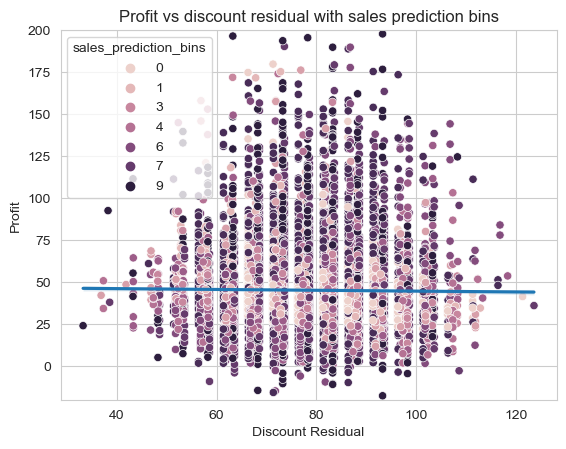

In [175]:
sns.scatterplot(data=df_discount_res, x='adjusted_discount_residual', y='profit', hue='sales_prediction_bins')
sns.regplot(data=df_discount_res, x="adjusted_discount_residual", y="profit", scatter=False)

plt.title('Profit vs discount residual with sales prediction bins')
plt.xlabel('Discount Residual')
plt.ylabel('Profit')
plt.ylim(-20, 200)

Like magic, the residual discount is as good as randomly assigned. This residual regression is what we call the debiasing step in FWL theorem.

Now we do the same residual treatment on profits.

In [176]:
model = smf.ols("profit ~ C(sales_prediction_bins)", data=df_discount_res).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     106.7
Date:                Mon, 01 Apr 2024   Prob (F-statistic):          1.44e-194
Time:                        17:00:06   Log-Likelihood:                -68079.
No. Observations:               15000   AIC:                         1.362e+05
Df Residuals:                   14990   BIC:                         1.363e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        44.9166      0.585     76.815      0.000      43.770      46.063
C(sales_prediction_bins)[T.1]     0.0089      0.827      0.011      0.991      -1.612       1.630
C(sales_prediction_bins)[T.2]    -2.4622      0.827     -2.979      0.003      -4.082      -0.842
C(sales_prediction_bins)[T.3]    -4.5998      0.827     -5.560      0.000      -6.222      -2.978
C(sales_prediction_bins)[T.4]    -6.4300      0.827     -7.776      0.000      -8.051      -4.809
C(sales_prediction_bins)[T.5]    -7.2366      0.827     -8.751      0.000      -8.857      -5.616
C(sales_prediction_bins)[T.6]    -1.2356      0.827     -1.494      0.135      -2.856       0.385
C(sales_prediction_bins)[T.7]     7.2118      0.827      8.721      0.000       5.591       8.833
C(sales_prediction_bins)[T.8]     9.0098      0.827     10.895      0.000       7.389      10.631
C(sales_prediction_bins)[T.9]     8.5705      0.827     10.364      0.000       6.950      10.191
==============================================================================
Omnibus:                    11355.133   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           579849.513
Skew:                           3.161   Prob(JB):                         0.00
Kurtosis:                      32.796   Cond. No.                         10.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [177]:
profit_predicted = model.predict(df_discount_res)

profit_residuals = df_discount_res['profit'] - profit_predicted 

df_profit_res = df_discount_res.copy()

df_profit_res['profit_residual'] = profit_residuals
df_profit_res['adjusted_profit_residual'] = df_profit_res['profit_residual'] + df_discount_res['profit'].mean()

df_profit_res[['profit', 'profit_residual', 'adjusted_profit_residual']].head()

,profit,profit_residual,adjusted_profit_residual
0,40.06,-13.866433,31.334318
1,29.52,-8.966613,36.234138
2,48.08,7.763126,52.963878
3,61.64,16.714487,61.915238
4,34.44,-9.241087,35.959665


(-20.0, 200.0)

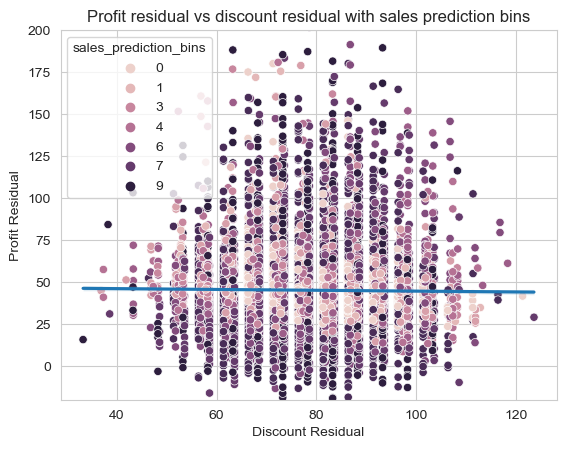

In [178]:
sns.scatterplot(data=df_profit_res, x='adjusted_discount_residual', y='adjusted_profit_residual', hue='sales_prediction_bins')
sns.regplot(data=df_profit_res, x="adjusted_discount_residual", y="adjusted_profit_residual", scatter=False)
plt.title('Profit residual vs discount residual with sales prediction bins')
plt.xlabel('Discount Residual')
plt.ylabel('Profit Residual')
plt.ylim(-20, 200)

In [179]:
df_profit_res["adjusted_profit_residual"].var(), df_profit_res["profit"].var()

(512.5731256022972, 545.4015163032522)

The difference in the profit vs discount residual and the profit residual vs discount residual plot is visually minor compared to the profit vs discount plot. The difference in profit residuals vs profit is smaller when sales_prediction_bins bias is removed, but it exists. The variance is reduced.

This second residual regression is called the denoising step in the FWL theorem.

Now let's regress profit residuals on discount residuals.

In [180]:
model = smf.ols("adjusted_profit_residual ~ adjusted_discount_residual", data=df_profit_res).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     adjusted_profit_residual   R-squared:                       0.000
Model:                                  OLS   Adj. R-squared:                  0.000
Method:                       Least Squares   F-statistic:                     2.144
Date:                      Mon, 01 Apr 2024   Prob (F-statistic):              0.143
Time:                              17:00:10   Log-Likelihood:                -68078.
No. Observations:                     15000   AIC:                         1.362e+05
Df Residuals:                         14998   BIC:                         1.362e+05
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     47.1222      1.325     35.556      0.000      44.524      49.720
adjusted_discount_residual    -0.0247      0.017     -1.464      0.143      -0.058       0.008
==============================================================================
Omnibus:                    11358.473   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           579356.418
Skew:                           3.163   Prob(JB):                         0.00
Kurtosis:                      32.782   Cond. No.                         563.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The linear co-efficient can be interpreted as how much we expect profit to change as we increase discount by one unit while holding `sales_prediction_bins` constant. That is a negative value. If we increase discount by 1 unit while sales predictions are held constant, we expect profit to go down by 0.0247 units, on an average.

Let's run a linear regressor on profit with discount and `sales_prediction_bins` as the independent variables.

In [181]:
model = smf.ols("profit ~ C(sales_prediction_bins) + discount", data=df_profit_res).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     96.23
Date:                Mon, 01 Apr 2024   Prob (F-statistic):          5.30e-194
Time:                        17:00:10   Log-Likelihood:                -68078.
No. Observations:               15000   AIC:                         1.362e+05
Df Residuals:                   14989   BIC:                         1.363e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        45.1995      0.616     73.397      0.000      43.992      46.407
C(sales_prediction_bins)[T.1]     0.3418      0.858      0.399      0.690      -1.339       2.023
C(sales_prediction_bins)[T.2]    -1.7348      0.964     -1.799      0.072      -3.625       0.156
C(sales_prediction_bins)[T.3]    -3.5352      1.102     -3.209      0.001      -5.694      -1.376
C(sales_prediction_bins)[T.4]    -4.9727      1.294     -3.842      0.000      -7.510      -2.436
C(sales_prediction_bins)[T.5]    -5.4330      1.484     -3.661      0.000      -8.342      -2.524
C(sales_prediction_bins)[T.6]     0.9766      1.723      0.567      0.571      -2.400       4.353
C(sales_prediction_bins)[T.7]     9.7498      1.921      5.075      0.000       5.984      13.515
C(sales_prediction_bins)[T.8]    11.9732      2.187      5.475      0.000       7.687      16.260
C(sales_prediction_bins)[T.9]    11.8579      2.393      4.954      0.000       7.167      16.549
discount                         -0.0247      0.017     -1.464      0.143      -0.058       0.008
==============================================================================
Omnibus:                    11358.473   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           579356.418
Skew:                           3.163   Prob(JB):                         0.00
Kurtosis:                      32.782   Cond. No.                     2.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The discount co-efficient is the same as the one we got above when we performed the regression on residual profit and discount. Running two different regression models, getting the residuals and running a third regression of the residuals is numerically equivalent to running a multiple linear regression.

Another thing you might notice is that the 95% Confidence Interval of the discount parameter contains zero, so we could argue that the effect is not statistically significant. However, if we add some predictive variables to our model we can reduce some variance, which increases the significance of the discount parameter by a lot.



In [182]:
model = smf.ols("profit~discount + C(sales_prediction_bins) + age", data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     327.4
Date:                Mon, 01 Apr 2024   Prob (F-statistic):               0.00
Time:                        17:00:10   Log-Likelihood:                -66930.
No. Observations:               15000   AIC:                         1.339e+05
Df Residuals:                   14988   BIC:                         1.340e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         6.0247      0.972      6.200      0.000       4.120       7.929
C(sales_prediction_bins)[T.1]    -3.3510      0.798     -4.200      0.000      -4.915      -1.787
C(sales_prediction_bins)[T.2]    -7.7562      0.901     -8.604      0.000      -9.523      -5.989
C(sales_prediction_bins)[T.3]   -12.1335      1.035    -11.724      0.000     -14.162     -10.105
C(sales_prediction_bins)[T.4]   -15.4909      1.217    -12.725      0.000     -17.877     -13.105
C(sales_prediction_bins)[T.5]   -17.2340      1.395    -12.355      0.000     -19.968     -14.500
C(sales_prediction_bins)[T.6]   -11.4120      1.615     -7.066      0.000     -14.578      -8.246
C(sales_prediction_bins)[T.7]    -3.1408      1.798     -1.747      0.081      -6.666       0.384
C(sales_prediction_bins)[T.8]    -1.1977      2.043     -0.586      0.558      -5.202       2.807
C(sales_prediction_bins)[T.9]     0.3677      2.229      0.165      0.869      -4.001       4.737
discount                         -0.0532      0.016     -3.401      0.001      -0.084      -0.023
age                               1.6064      0.032     49.799      0.000       1.543       1.670
==============================================================================
Omnibus:                    12947.193   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           933715.044
Skew:                           3.778   Prob(JB):                         0.00
Kurtosis:                      40.906   Cond. No.                     2.34e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We've now debiased the relationship between discount and profits so that it is no longer confounded by sales prediction. Now that we've removed the bias, we can call the relationship causal. If that is the cause, the causal effect of discount on profits is negative to negligent. At first, we thought it was a positive relationship but that was due to the confounding variables. We've essentially removed the arrow going from sales prediction to discount.

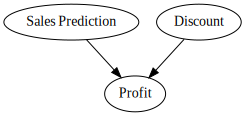

In [186]:
g = gr.Digraph()


g.edge("Sales Prediction", "Profit")
g.edge("Discount", "Profit")

g


If the metric the e-commerce company is optimizing for is profits, we would recommend that they do not keep the discounts or find a better way to offer discounts that might lead to higher profits.